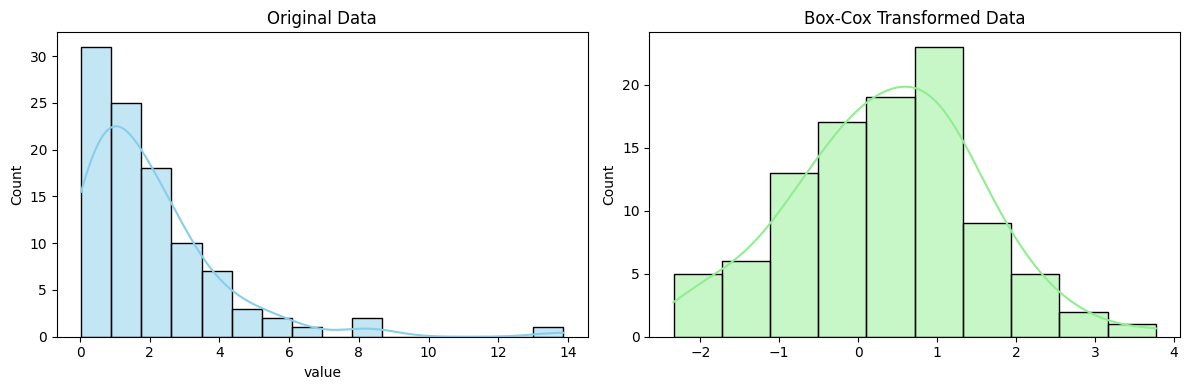

Lambda used for transformation: 0.25898675313664976


In [1]:
# Question: Power Transformation (Box-Cox) Method
# Description: Use Box-Cox transformation to stabilize variance and make the data more normal.

import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

def apply_boxcox_transformation(data, column):
    """
    Applies Box-Cox transformation to a specified column in a DataFrame.

    Parameters:
    - data: pd.DataFrame with numerical data.
    - column: Name of the column to transform.

    Returns:
    - Transformed column (np.ndarray), lambda used, and original and transformed histograms.
    """
    if (data[column] <= 0).any():
        raise ValueError("Box-Cox transformation requires all data to be positive.")

    transformed_data, fitted_lambda = boxcox(data[column])
    
    # Plot before and after
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data[column], ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title('Original Data')

    sns.histplot(transformed_data, ax=axes[1], kde=True, color='lightgreen')
    axes[1].set_title('Box-Cox Transformed Data')
    plt.tight_layout()
    plt.show()

    return transformed_data, fitted_lambda

# Example usage
df = pd.DataFrame({
    'value': np.random.exponential(scale=2.0, size=100)
})

transformed, lam = apply_boxcox_transformation(df, 'value')
print(f"Lambda used for transformation: {lam}")

